# Exploring the Bound State Spectrum for Intermediate Potentials

## Introduction

In quantum mechanics, bound states represent scenarios where particles are confined within a finite region of space, due to the presence of a potential well. Two classic examples of such systems are the **infinite square well** and the **harmonic oscillator**:

- **Infinite Square Well:** A potential that is zero inside a finite region and infinite outside it. The energy levels of this system are quantized and show increasing spacing as the energy increases.
- **Harmonic Oscillator:** A potential that is quadratic in position, representing a particle in a spring-like force field. The energy levels of this system are also quantized but are equally spaced.

### Objective

This notebook aims to explore the bound state spectrum for potentials that lie "intermediate" between a harmonic oscillator and an infinite square well. Specifically, we will consider potentials of the form:

$$
U(x) = |x|^\alpha, \quad \text{for} \; \alpha \geq 2
$$

We are interested in understanding:

- How the spectrum of energy levels changes as we vary the parameter $\alpha$, transitioning from a harmonic potential ($\alpha = 2$) to more well-like potentials ($\alpha \to \infty$).
- How the wavefunctions corresponding to these energy levels evolve with changing $\alpha$.

### Methodology

1. **Numerical Solution of the Schrödinger Equation:** We'll discretize the spatial domain and construct the Hamiltonian matrix using finite difference methods.
2. **Eigenvalue Computation:** The energy levels (eigenvalues) and the corresponding wavefunctions (eigenvectors) will be computed numerically.
3. **Visualization:** We'll visualize how the energy levels and wavefunctions change with different values of \(\alpha\), providing insights into the transition between harmonic and square well behaviors.

### Why This is Interesting

Understanding the behavior of quantum systems with intermediate potentials has significant implications in various fields of physics, including quantum chemistry and materials science. It helps us comprehend how real-world potentials, which are often neither purely harmonic nor square well, influence the quantization of energy levels and the behavior of quantum states.

OKAY! Let's dive into the computation and visualization to uncover these quantum behaviors!



Let's start by importing some potentially usefull libraries. PennyLane is great for defining quantum operations and performing quantum simulations. NumPy is useful for numerical operations we will be performing. Matplotlib is for the visualisations. 

In [2]:
# Import necessary libraries
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Setting up a seed for reproducibility
np.random.seed(42)

# Optional: Configure matplotlib for inline plotting in Jupyter
%matplotlib inline


## Defining the Potential Function
Now define the potential function $U(x) = |x|^\alpha$.

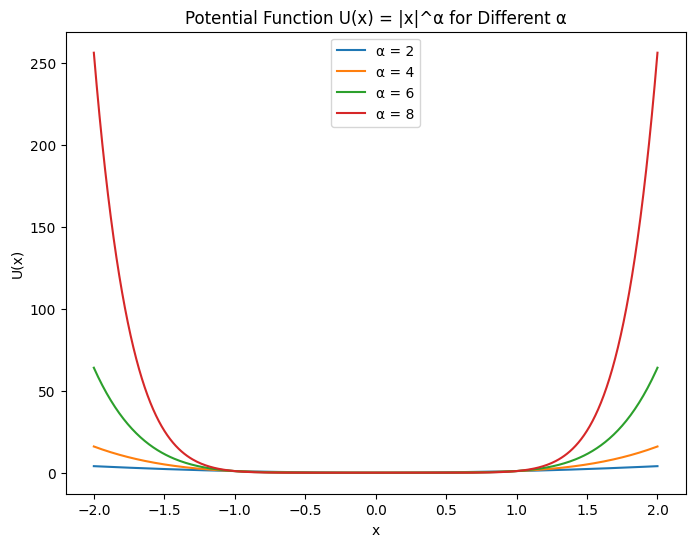

In [27]:
def potential_function(x, alpha):
    """
    Define the potential function U(x) = |x|^alpha.
    
    Args:
        x (float or ndarray): The position(s) where the potential is evaluated.
        alpha (float): The exponent parameter defining the shape of the potential.
        
    Returns:
        float or ndarray: The value of the potential at position(s) x.
    """
    return np.abs(x) ** alpha

#Plot potential for different alpha values
x_values = np.linspace(-2, 2, 400)  # Define a range for x, play around with different values of x 
alphas = [2, 4, 6, 8]  # Example alpha values

plt.figure(figsize=(8, 6))
for alpha in alphas:
    plt.plot(x_values, potential_function(x_values, alpha), label=f'α = {alpha}')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.title('Potential Function U(x) = |x|^α for Different α')
plt.legend()
plt.show()


Notice that with increasing value of $\alpha$ the potential flattens out near the origin and becomes steeper near the edges and might start mimicking that of a square well more closely. Feel fre to play around with different values of $x$ and $\alpha$ and see what it looks like.


# Constructing the Hamiltonian Matrix for Quantum Systems


In quantum mechanics, the Hamiltonian operator represents the total energy of a system and is essential for solving the Schrödinger equation to find the energy levels and wavefunctions of a particle in a potential. In this notebook, we construct the Hamiltonian matrix using the **finite difference method** for a one-dimensional system with a potential $U(x) = |x|^\alpha$.

## Hamiltonian Operator

The Hamiltonian operator $ \hat{H} $ consists of two main components:

$$
\hat{H} = \hat{T} + \hat{V}
$$

where:
- $ \hat{T} $ is the kinetic energy operator.
- $ \hat{V} $ is the potential energy operator.

### 1. Kinetic Energy Term

In atomic units (where $ \hbar = 1 $ and $ m = 1 $), the kinetic energy operator is:

$$
\hat{T} = -\frac{1}{2} \frac{d^2}{dx^2}
$$

To implement this numerically, we use the **central finite difference approximation** for the second derivative:

$$
\frac{d^2\psi}{dx^2} \approx \frac{\psi(x + dx) - 2\psi(x) + \psi(x - dx)}{dx^2}
$$

This can be represented in matrix form:

$$
T = -\frac{1}{2} \frac{1}{dx^2} \begin{pmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2
\end{pmatrix}
$$

### 2. Potential Energy Term

The potential energy operator $ \hat{V} $ is a multiplication operator that depends on position $ x $:

$$
V(x) = U(x) = |x|^\alpha
$$

To represent this numerically, we create a **diagonal matrix** with the potential values:

$$
V = \text{diag}(U(x_1), U(x_2), \ldots, U(x_n))
$$

### 3. Hamiltonian Matrix

The Hamiltonian matrix $ H $ is the sum of the kinetic and potential energy matrices:

$$
H = T + V
$$

where:
- $ T $ is the kinetic energy matrix.
- $ V $ is the potential energy matrix.

### 4. Solving the Schrödinger Equation

The time-independent Schrödinger equation in matrix form is:

$$
H \Psi = E \Psi
$$

where:
- $ E $ are the eigenvalues representing the energy levels.
- $ \Psi $ are the eigenvectors representing the corresponding wavefunctions.

By solving this eigenvalue problem, we obtain the quantized energy levels and the corresponding wavefunctions for the quantum system.

The construction of the Hamiltonian matrix using the finite difference method allows us to numerically solve the Schrödinger equation for various potentials, providing insights into the energy spectra and wavefunction behaviors of quantum systems.


Now we should set up a grid and the Hamiltonian matrix for the numerical computation of the solution.
- **Grid Setup:** We discretize the spatial domain $x$ into a finite number of points to solve the Schrödinger equation numerically.
- **Hamiltonian Matrix:** We construct the Hamiltonian matrix using finite differences for the kinetic energy term and a diagonal matrix for the potential energy term.

In [28]:
# Parameters for the grid
x_min, x_max = -2, 2  # Domain of x, different values can be chosen by playing around and looking at previous visualisation 
num_points = 500  # Number of points in the grid
x_grid = np.linspace(x_min, x_max, num_points)  # Define the grid

# Discretization parameters
dx = x_grid[1] - x_grid[0]  # Grid spacing

def hamiltonian_matrix(x_grid, alpha):
    """
    Construct the Hamiltonian matrix using the finite difference method.

    Args:
        x_grid (ndarray): The discretized spatial grid.
        alpha (float): The exponent parameter for the potential.
        
    Returns:
        ndarray: The Hamiltonian matrix.
    """
    # Kinetic energy term using finite differences (central difference approximation)
    kinetic = -0.5 * (np.diag(np.ones(num_points - 1), -1) - 2 * np.diag(np.ones(num_points)) + np.diag(np.ones(num_points - 1), 1)) / (dx ** 2)
    
    # Potential energy term as a diagonal matrix
    potential = np.diag(potential_function(x_grid, alpha))
    
    # Hamiltonian is the sum of kinetic and potential energy terms
    H = kinetic + potential
    
    return H

# As an example lets construct Hamiltonian for alpha = 4
H_alpha_4 = hamiltonian_matrix(x_grid, alpha=4)


- **num_points** was chosen as 500 as it is typically sufficient to capture the essential features of the wavefunctions and energy levels. Choosing more points could be better, but increases the computational cost as the Hamiltonian matrix above $500 \times 500$ could increase computational load substantially. Feel free to play around witht the grid size keeping these factors in mind.
- a good **excersize** would be to play around with these values and optimize the accuracy vs performance. If you find that wavefunctions are not well resolved or the higher energy levels are nopt converging then increase the number of points. If you find that you are just doing a quick calculation and don't mind losing some accuracy try decreasing number of points and compare.

# Computing The Energy Spectrum

We'll compute the eigenvalues and eigenvectors of the Hamiltonian matrix using NumPy's linear algebra package. The eigenvalues represent the energy levels, while the eigenvectors represent the corresponding wavefunctions.

 To Note:
- `eigh`: This function computes the eigenvalues and eigenvectors of a Hermitian matrix (like our Hamiltonian).
- Sorting: The eigenvalues are sorted in ascending order to represent the energy levels correctly.

In [29]:
# Import the linear algebra module from NumPy
from numpy.linalg import eigh

def compute_spectrum(hamiltonian_matrix):
    """
    Compute the eigenvalues and eigenvectors of the Hamiltonian matrix.

    Args:
        hamiltonian_matrix (ndarray): The Hamiltonian matrix.
        
    Returns:
        tuple: A tuple containing the sorted eigenvalues and corresponding eigenvectors.
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(hamiltonian_matrix)
    
    # Sort eigenvalues and eigenvectors in ascending order
    idx = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return eigenvalues, eigenvectors

# Compute spectrum for alpha = 4. Feel free to change this value as needed
eigenvalues, eigenvectors = compute_spectrum(H_alpha_4)

# Display the first few energy levels
print("First 10 Energy Levels for alpha = 4:")
print(eigenvalues[:10])


First 10 Energy Levels for alpha = 4:
[ 0.66882677  2.40034647  4.7298309   7.45479147 10.57902219 14.15021838
 18.22809826 22.86007496 28.07525815 33.88879959]


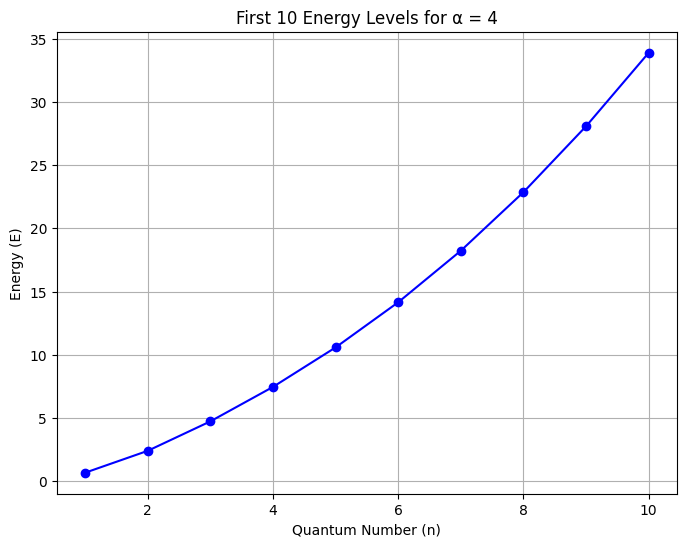

In [30]:
# Plot the first few energy levels
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), eigenvalues[:10], 'bo-', label='Energy Levels')
plt.xlabel('Quantum Number (n)')
plt.ylabel('Energy (E)')
plt.title('First 10 Energy Levels for α = 4')
plt.grid(True)
plt.show()


Observations from the Plot:

1. **Increasing Energy Spacing:**
   - The plot shows that as the quantum number $n$ increases, the energy levels also increase, and the spacing between consecutive energy levels becomes larger.
   - This behavior is typical for potentials that are steeper than a harmonic oscillator but not as extreme as a square well.

2. **Quadratic-like Growth:**
   - The curve exhibits growth faster than linear, suggesting a quadratic or higher-order polynomial relationship between energy $E$ and quantum number $n$.
   - This is consistent with the potential $U(x) = |x|^4$, which grows faster than the harmonic oscillator potential ($U(x) = x^2$) but does not have the infinite barriers of a square well.


Feel free to **explore** how these results change for different values of $\alpha$ and discuss the transition from harmonic to square well behavior.


Comparison with Other Potentials

- **Harmonic Oscillator ($\alpha = 2$):** Energy levels are equally spaced: $E_n \propto n + \frac{1}{2}$.
- **Square Well ($\alpha \to \infty$):** Energy levels grow quadratically with $n$: $E_n \propto n^2$.
- **Intermediate Potential ($\alpha = 4$):** The energy levels grow faster than linear (like a harmonic oscillator) but slower than quadratic (like a square well).

The energy spectrum for $\alpha = 4$ shows a characteristic pattern that lies between the harmonic oscillator and the square well potential, providing a rich area for further exploration and comparison.

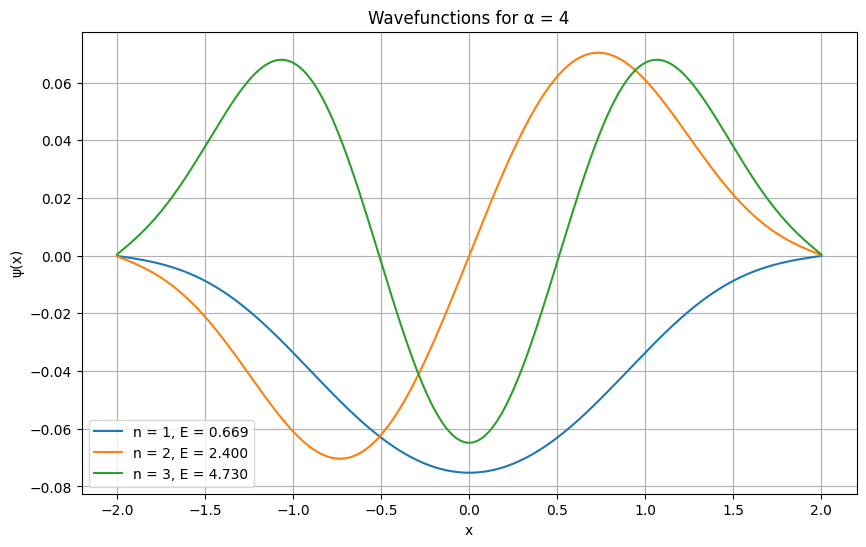

In [31]:
# Plot the first few wavefunctions
plt.figure(figsize=(10, 6))
for i in range(3):  # Plot first 3 wavefunctions
    plt.plot(x_grid, eigenvectors[:, i], label=f'n = {i+1}, E = {eigenvalues[i]:.3f}')

plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title('Wavefunctions for α = 4')
plt.legend()
plt.grid(True)
plt.show()


 Analysis of Wavefunctions for $\alpha = 4$

 **Symmetry of the Wavefunctions:**
   - The wavefunctions exhibit symmetry about $x = 0$, consistent with the symmetric potential $U(x) = |x|^4$.
   - The first wavefunction (n=1) is symmetric (even parity), the second (n=2) is antisymmetric (odd parity), and the third (n=3) is symmetric again. This alternating symmetry is characteristic of quantum systems in symmetric potentials.

 **Nodal Structure:**
   - The wavefunctions have nodes (points where $\psi(x) = 0$) that increase in number with the quantum number $n$:
     - **n = 1:** No nodes (other than at the boundaries, $x = \pm1$).
     - **n = 2:** One node.
     - **n = 3:** Two nodes.
   - This pattern reflects the general quantum mechanical rule that the $n$-th wavefunction has $n-1$ nodes.



# Explore different $\alpha$ values

Now, let's explore how the energy levels and wavefunctions change as we vary $\alpha$. We'll loop over different $\alpha$ values and compute the spectrum for each. This will help us understand the transition from the harmonic oscillator (where $\alpha = 2$)
to the infinite square well ( $\alpha \to \infty$)

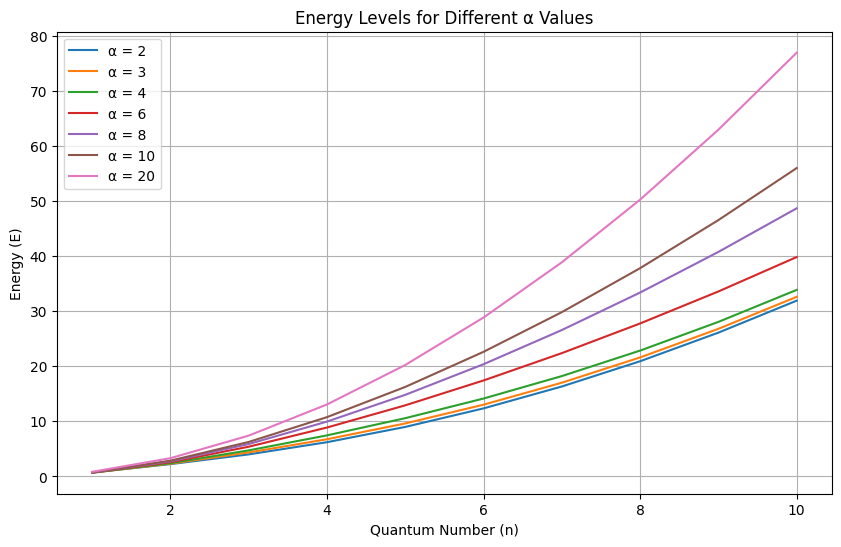

In [33]:
# Define a range of alpha values to explore
alpha_values = [2, 3, 4, 6, 8, 10, 20]

# Initialize a dictionary to store eigenvalues for different alpha
spectra = {}

# Compute spectra for each alpha value
for alpha in alpha_values:
    H = hamiltonian_matrix(x_grid, alpha)
    eigenvalues, eigenvectors = compute_spectrum(H)
    spectra[alpha] = eigenvalues

# Plot the energy levels for different alpha values
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    plt.plot(range(1, 11), spectra[alpha][:10], label=f'α = {alpha}')

plt.xlabel('Quantum Number (n)')
plt.ylabel('Energy (E)')
plt.title('Energy Levels for Different α Values')
plt.legend()
plt.grid(True)
plt.show()


 **Energy Level Spacing and Growth:**
   - As $\alpha$ increases, the spacing between consecutive energy levels grows. This indicates that the potential becomes steeper, causing higher energy states to require significantly more energy.
   - For lower $\alpha$ values (e.g., $\alpha = 2, 3, 4$), the energy levels increase more gradually, similar to the harmonic oscillator, where levels are equally spaced.

. **Transition from Harmonic Oscillator to Square Well:**
   - The plot shows that for smaller $\alpha$, the energy levels are more closely spaced, resembling the behavior of a harmonic oscillator ($\alpha = 2$).
   - As $\alpha$ increases (e.g., $\alpha = 6, 8, 10, 20$), the energy levels begin to spread apart more significantly, reflecting a transition towards the behavior of an infinite square well ($\alpha \to \infty$), where energy levels grow quadratically with the quantum number $n$.

. **Quadratic-Like Behavior for Large $\alpha$:**
   - For $\alpha = 20$, the growth of energy levels appears almost quadratic, indicating that the potential is approaching a shape similar to an infinite square well. This is characterized by the sharp increase in energy as the quantum number increases, aligning with the square well's quadratic energy level spacing.

 **Behavior at Intermediate $\alpha$ Values:**
   - At intermediate values of $\alpha$ (e.g., $\alpha = 4, 6, 8$), the energy levels reflect a mixture of both harmonic and square well characteristics. The energy grows faster than linearly but slower than quadratically, representing a smooth transition between these two regimes.

This is a clear illustration of how the energy levels of a quantum system evolve as the potential shape transitions from a harmonic oscillator to a square well. This transition is governed by the parameter $\alpha$, with larger values of $\alpha$ leading to a steeper potential and hence a more rapid increase in energy levels.

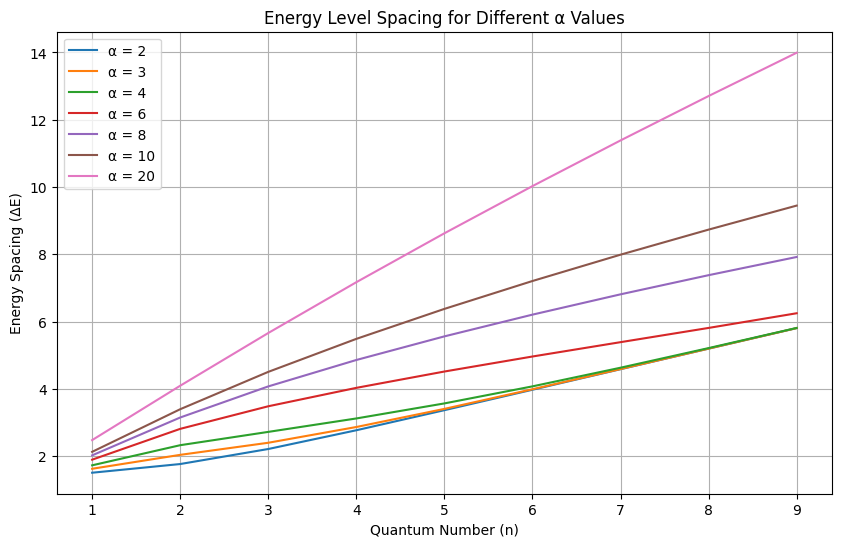

In [38]:
# Compute energy spacing (difference between consecutive energy levels) for each alpha
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    spacings = np.diff(spectra[alpha][:10])  # Compute spacings between first 10 levels
    plt.plot(range(1, 10), spacings, label=f'α = {alpha}')

plt.xlabel('Quantum Number (n)')
plt.ylabel('Energy Spacing (ΔE)')
plt.title('Energy Level Spacing for Different α Values')
plt.legend()
plt.grid(True)
plt.show()


**Increasing Energy Spacing with $\alpha$:**
   - The plot shows that as $\alpha$ increases, the spacing between consecutive energy levels ($\Delta E$) also increases.
   - For smaller $\alpha$ values (e.g., $\alpha = 2, 3, 4$), the energy spacings remain relatively small and increase gradually, indicating that the potential is less steep and more akin to a harmonic oscillator.

 **Linear and Beyond-Linear Growth of Spacing:**
   - For larger $\alpha$ values (e.g., $\alpha = 8, 10, 20$), the energy spacings exhibit a more pronounced increase, which suggests a transition toward a steeper potential that more closely resembles a square well.
   - Particularly for $\alpha = 20$, the energy spacing grows almost linearly with the quantum number $n$, reflecting the characteristic quadratic increase in energy levels for an infinite square well potential.

**Behavior at Intermediate $\alpha$ Values:**
   - For intermediate $\alpha$ values (e.g., $\alpha = 4, 6$), the energy spacing grows faster than for lower $\alpha$ but slower than for the highest $\alpha$ values. This indicates a potential that is steeper than a harmonic oscillator but not as steep as a square well.

**Quadratic-Like Energy Spacing for Large $\alpha$:**
   - For the largest $\alpha$ values (e.g., $\alpha = 20$), the plot shows a clear trend towards increasing energy spacing as $n$ increases, indicating the potential is becoming more "square well-like," where the energy levels are more widely spaced as the particle is more confined.

This is a demonsstration of how the energy level spacing $\Delta E$ changes as a function of the potential shape parameter $\alpha$. As $\alpha$ increases, the potential becomes steeper, leading to larger energy spacings. This transition highlights the continuous change from harmonic oscillator-like behavior (small $\alpha$) to square well-like behavior (large $\alpha$).


# Note

 an interesting observation that for $ \alpha$ = 2,3,4, the energy spacings seem to converge or become very close around $n = 9$. This convergence suggests that, despite the different potential shapes for these $ \alpha$ values, the energy spacing between higher energy levels becomes similar at this point. 

 The convergence observed could also be partly due to the resolution of the numerical computation. As n increases, the eigenvalues and their differences could be influenced by numerical precision or the grid resolution, especially if the energy levels become very close.